<a href="https://colab.research.google.com/github/peram-bala/Chicago-CrimeData-Analysis/blob/main/Chicago_Crime_Data_Bala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Ingestion:
    
    def __init__(self,path):
        self.path=path
    
    def readCSV(self):
        dataFrame = pd.read_csv(self.path)
        return dataFrame
    
    def readCSVWithoutErrors(self):
        dataFrame = pd.read_csv(self.path,error_bad_lines=False,na_values = [None, 'NaN','Nothing'], header = 0)
        return dataFrame

In [3]:
class Transformation:
    
    def combine(self,df1,df2,df3):
        dataFrame = [Crime_5_7, Crime_8_11, Crime_12_17]
        return dataFrame
    
    def removeDuplicates(self,df):
        df.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
        return df
    
    def removeColumns(self,df):
        df.drop(['Unnamed: 0','Case Number','IUCR','FBI Code','Updated On','Location',
                 'X Coordinate','Y Coordinate','Location'], inplace = True, axis = 1)
        return df
    def addColumns(self,df):
        df['Primary Type'] = pd.Categorical(Crime_Data['Primary Type'])
        df['Description'] = pd.Categorical(Crime_Data['Description'])
        df['Location Description'] = pd.Categorical(Crime_Data['Location Description'])
        return df
    
    def delete(self,df):
        del df
        
    def pivotTable(self,df):
        df.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type', 
                                         index = Crime_Data.index.date, fill_value = 0)
        return df

    def removeNull(self,df):
        df.dropna(axis = 0, how = 'any')
        return df

In [4]:
try:
    Crime05_07 = Ingestion('Chicago_Crimes_2005_to_2007.csv')
    Crime08_11 = Ingestion('Chicago_Crimes_2008_to_2011.csv')
    Crime12_17 = Ingestion('Chicago_Crimes_2012_to_2017.csv')
except Exception as e:
    print(e,'Injestion Error!')

In [7]:
try:
    Crime_5_7 = Crime05_07.readCSVWithoutErrors()
    Crime_8_11 = Crime08_11.readCSVWithoutErrors()
    Crime_12_17 = Crime12_17.readCSVWithoutErrors()
except Exception as e:
    print(e,'Reading Data Unsuccessful!')
    

In [8]:
try:
    trans = Transformation()
    Crime_Data = trans.combine(Crime_5_7, Crime_8_11, Crime_12_17)
    trans.delete(Crime_5_7)
    trans.delete(Crime_8_11)
    trans.delete(Crime_12_17)
except Exception as e:
    print(e,"Unsuccesful Data Transformations!")

In [9]:
try:
    Crime_Data = pd.concat(Crime_Data,axis = 0)
    Crime_Data = trans.removeDuplicates(Crime_Data)
    Crime_Data = trans.removeColumns(Crime_Data)
    Crime_Data.Date = pd.to_datetime(Crime_Data.Date, format = '%m/%d/%Y %I:%M:%S %p')
    Crime_Data.index = pd.DatetimeIndex(Crime_Data.Date)
    Crime_Data = trans.addColumns(Crime_Data)
except Exception as e:
    print(e,"Unsuccessful Transformations!")
    

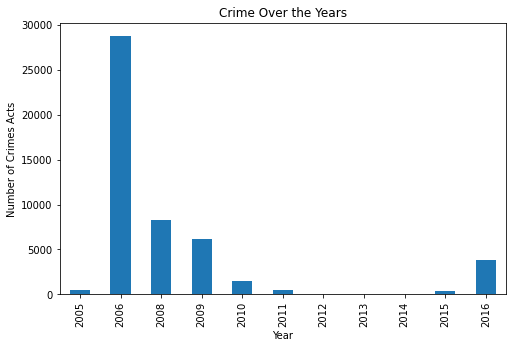

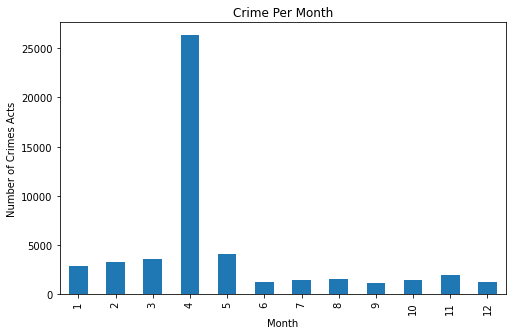

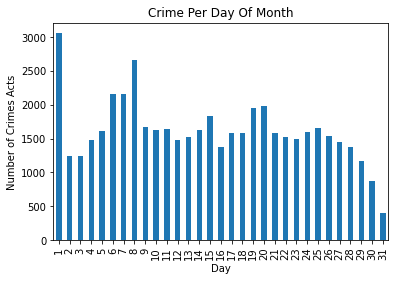

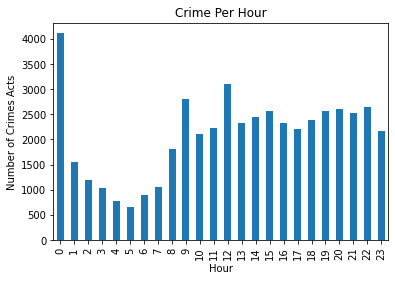

In [10]:
#make graph of crimes per year
plt.figure(figsize = (8,5))
Crime_Data.groupby([Crime_Data.index.year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()
plt.figure(figsize = (8,5))
#make graph of crimes per month
Crime_Data.groupby([Crime_Data.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()
#graph of crimes per day
Crime_Data.groupby([Crime_Data.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()
#graph of crimes per hour
Crime_Data.groupby([Crime_Data.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [11]:
try:
    Crime_Data_date = trans.pivotTable(Crime_Data)
    Crime_Data_date.index = pd.DatetimeIndex(Crime_Data_date.index)
except Exception as e:
    print(e,"Unsuccessful Transformations")
    

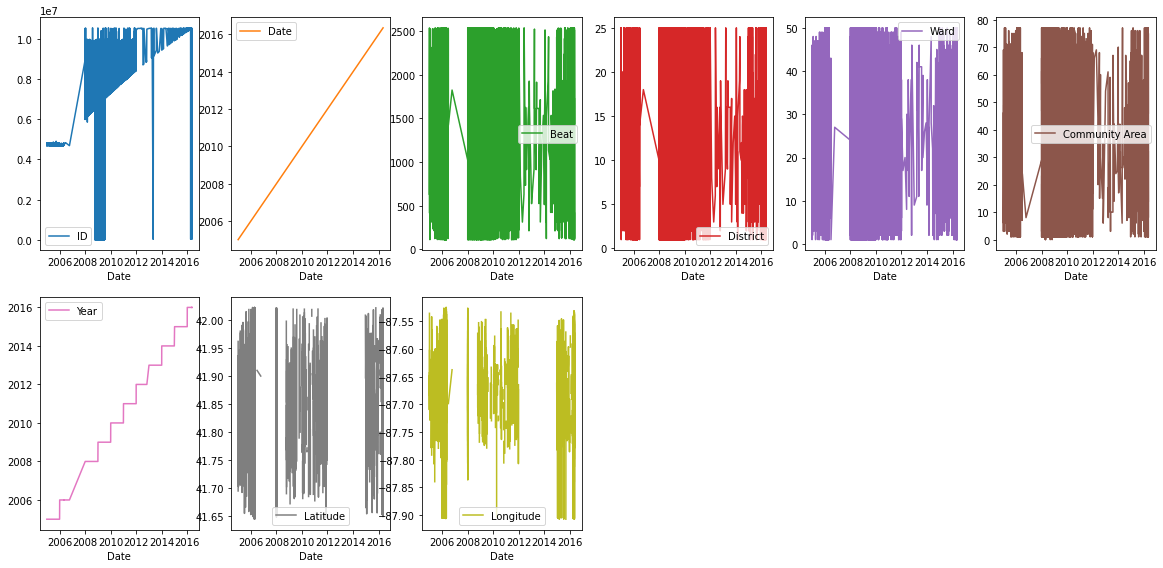

In [12]:
#make graph of different types of crimes per month
Plot = Crime_Data_date.plot(figsize = (20,30), subplots = True, layout = (6,6),
                                  sharex = False, sharey = False)
plt.show()

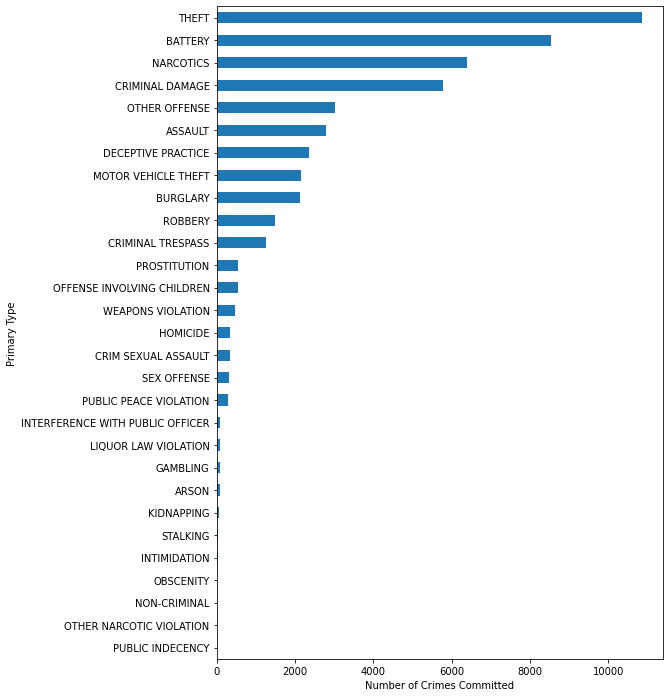

In [13]:
#plot of the relatives amounts of each type of crime
plt.figure(figsize = (8,12))
Crime_Data.groupby(Crime_Data['Primary Type']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Number of Crimes Committed')
plt.show()

In [14]:
#remove NAs from Longitude and Latitude data
Crime_Data = trans.removeNull(Crime_Data)

In [15]:
#extract year data for each crime, plot using matplotlib for each year the latitude and longitude variables
#make color by Description column
Groups = Crime_Data.groupby(Crime_Data['Primary Type'])
Groups = dict(list(Groups))
Keys = list(Groups.keys())

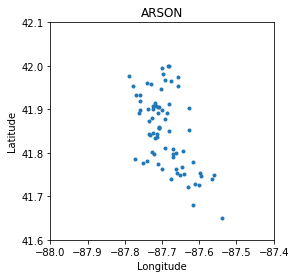

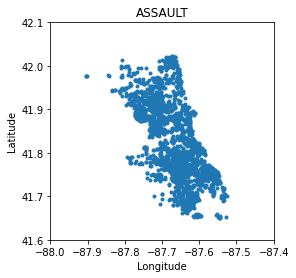

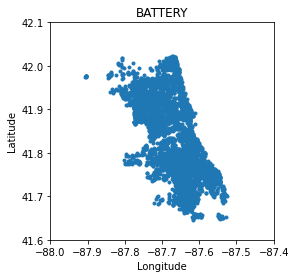

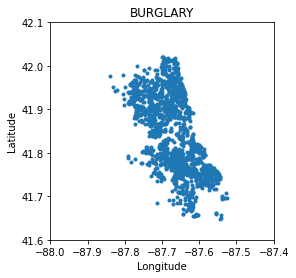

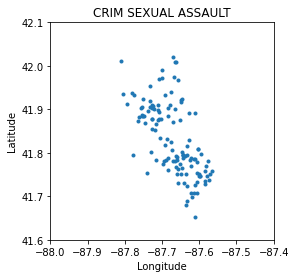

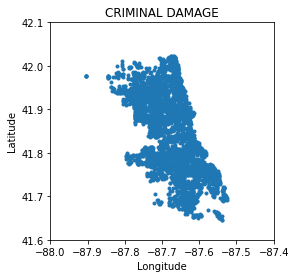

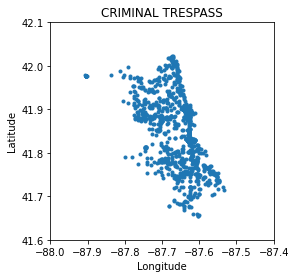

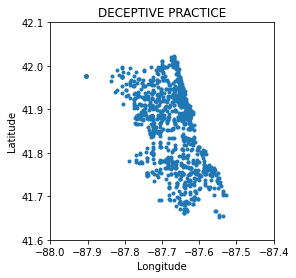

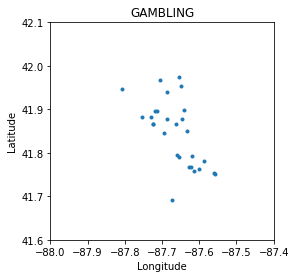

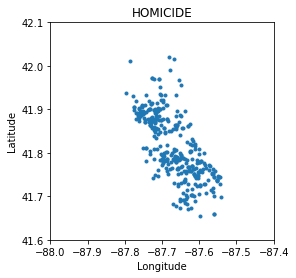

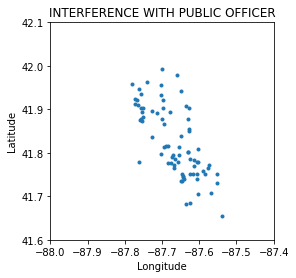

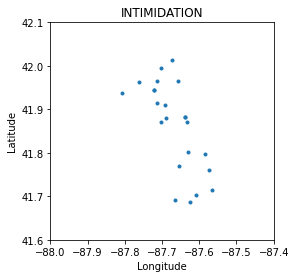

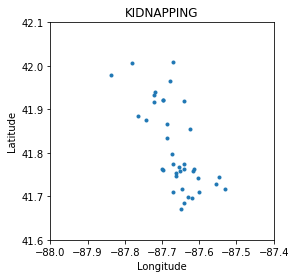

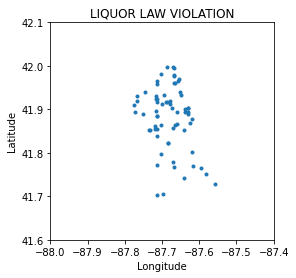

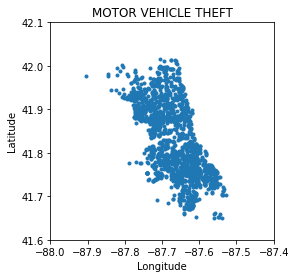

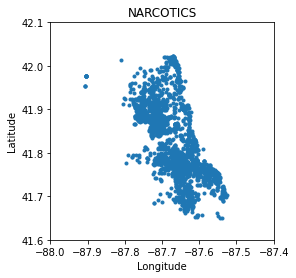

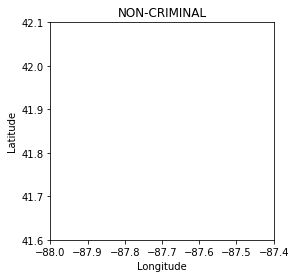

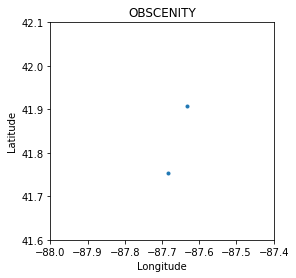

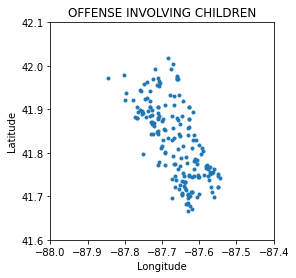

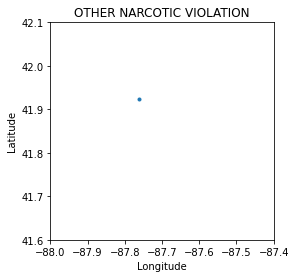

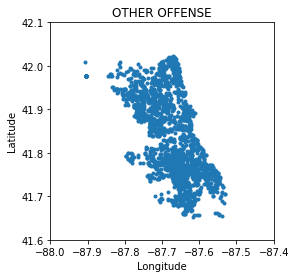

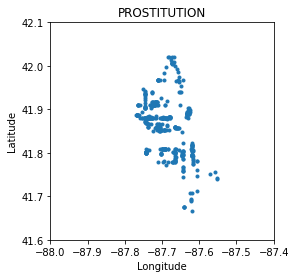

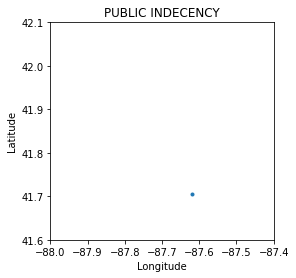

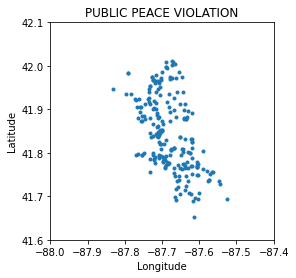

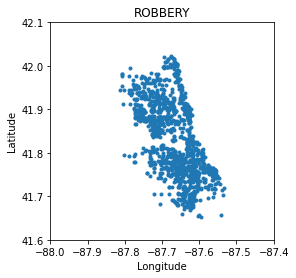

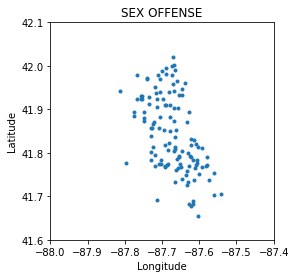

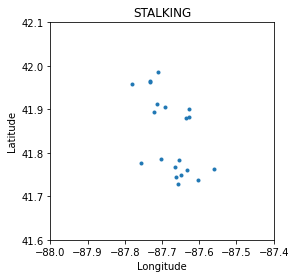

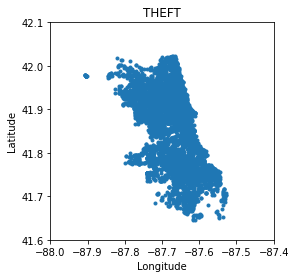

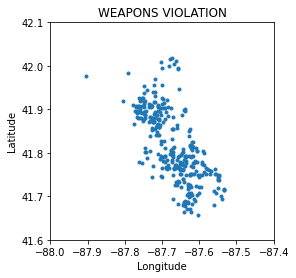

In [16]:
for key in Keys:
    plt.figure(figsize = (4,4))
    plt.scatter(Groups[key].Longitude, Groups[key].Latitude, marker = '.')
    plt.ylim(41.6,42.1)
    plt.xlim(-88,-87.4)
    plt.title(key)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

In [17]:
Arrest_Data = Crime_Data.drop('Arrest', axis = 1)
Arrest_Data = Arrest_Data.drop('Date', axis = 1)
Arrest_Data = Arrest_Data.drop('Block', axis = 1)
Arrest_Target = Crime_Data['Arrest']

In [18]:
Arrest_Data['Primary Type'] = (Arrest_Data['Primary Type']).cat.codes
Arrest_Data['Location Description'] = (Arrest_Data['Location Description']).cat.codes
Arrest_Data['Description'] = (Arrest_Data['Description']).cat.codes

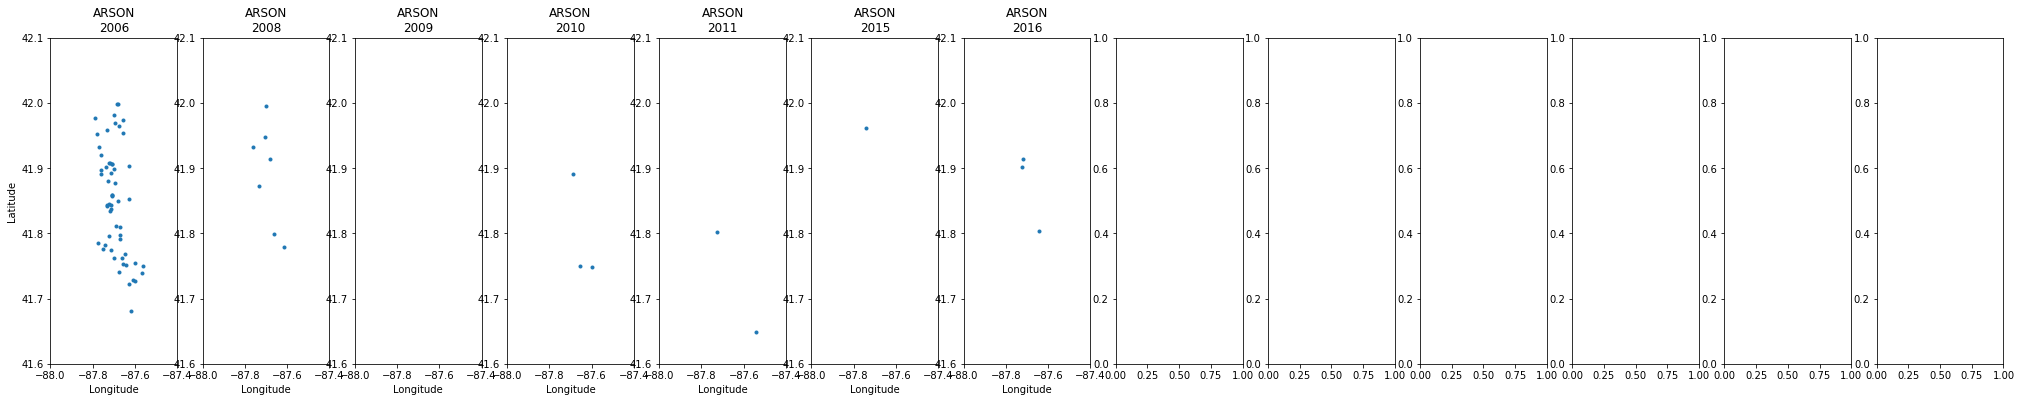

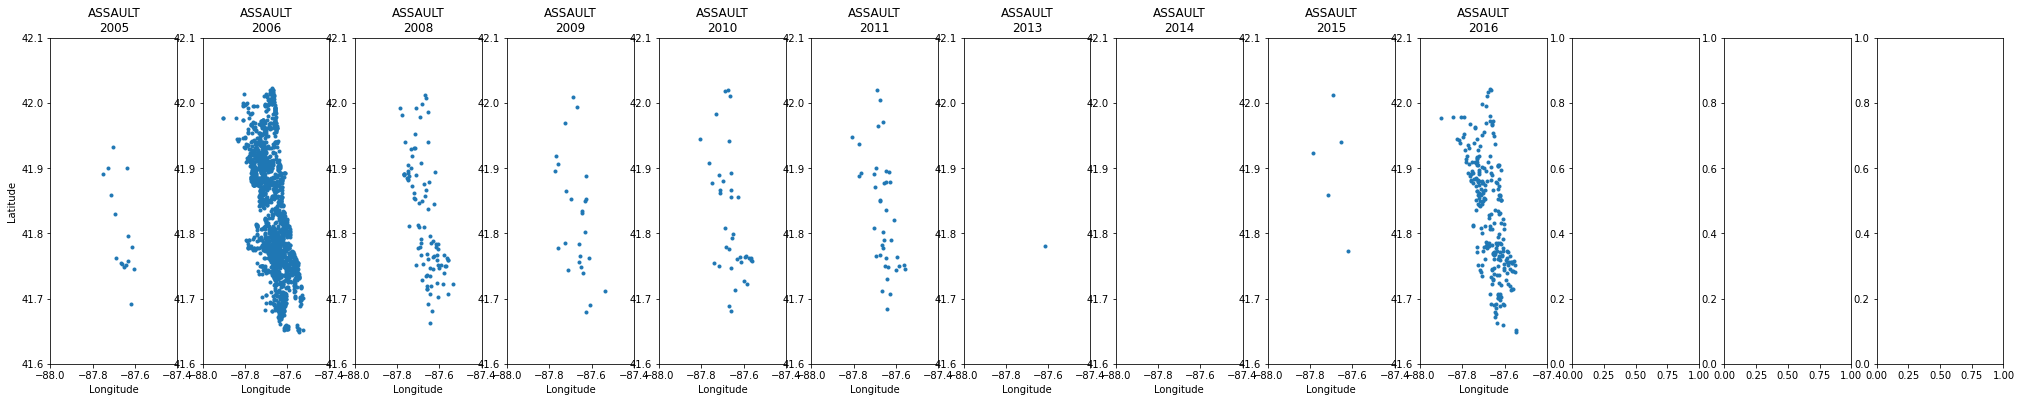

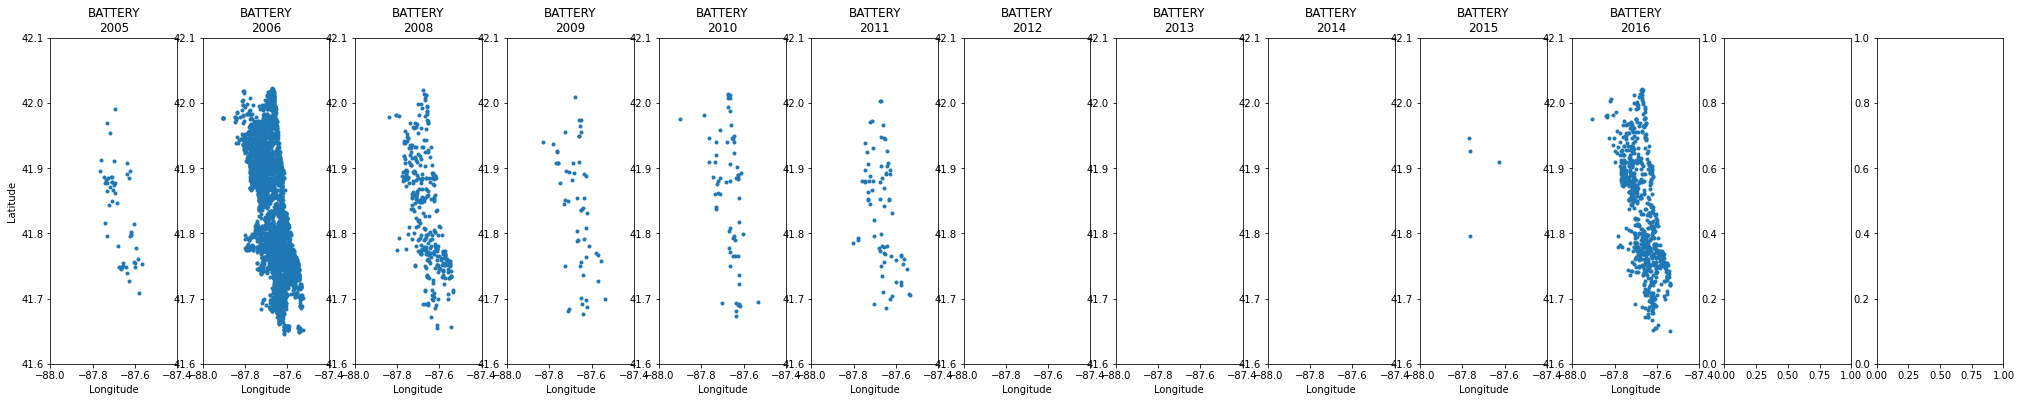

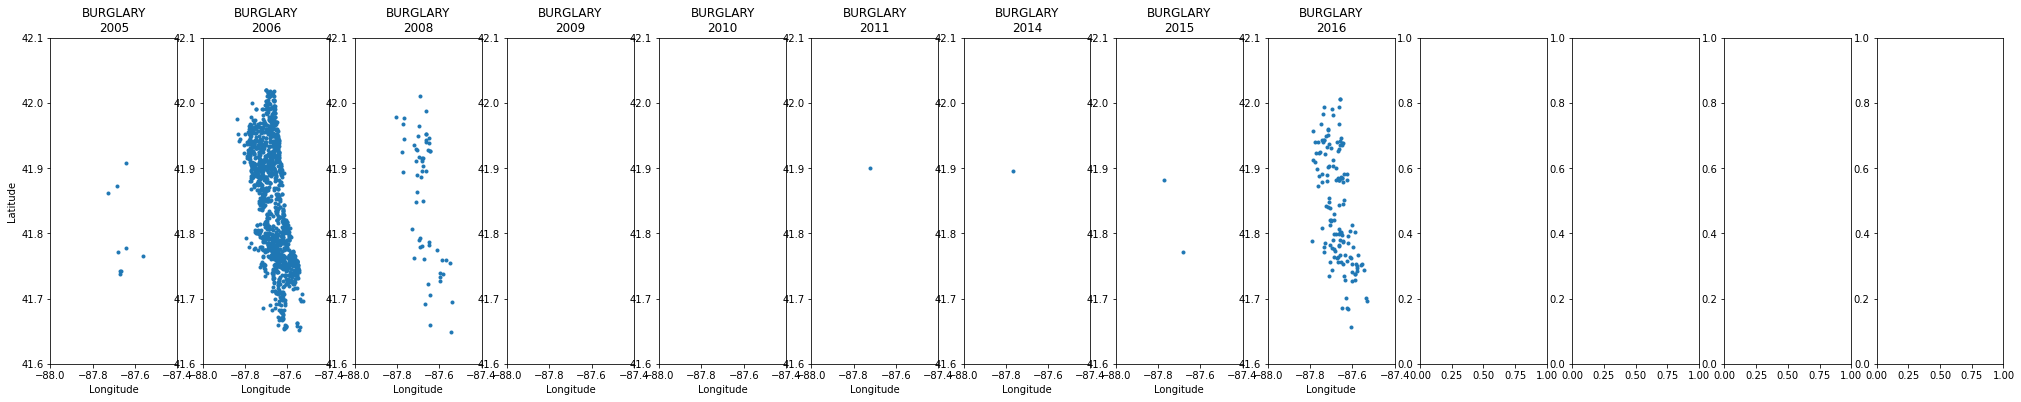

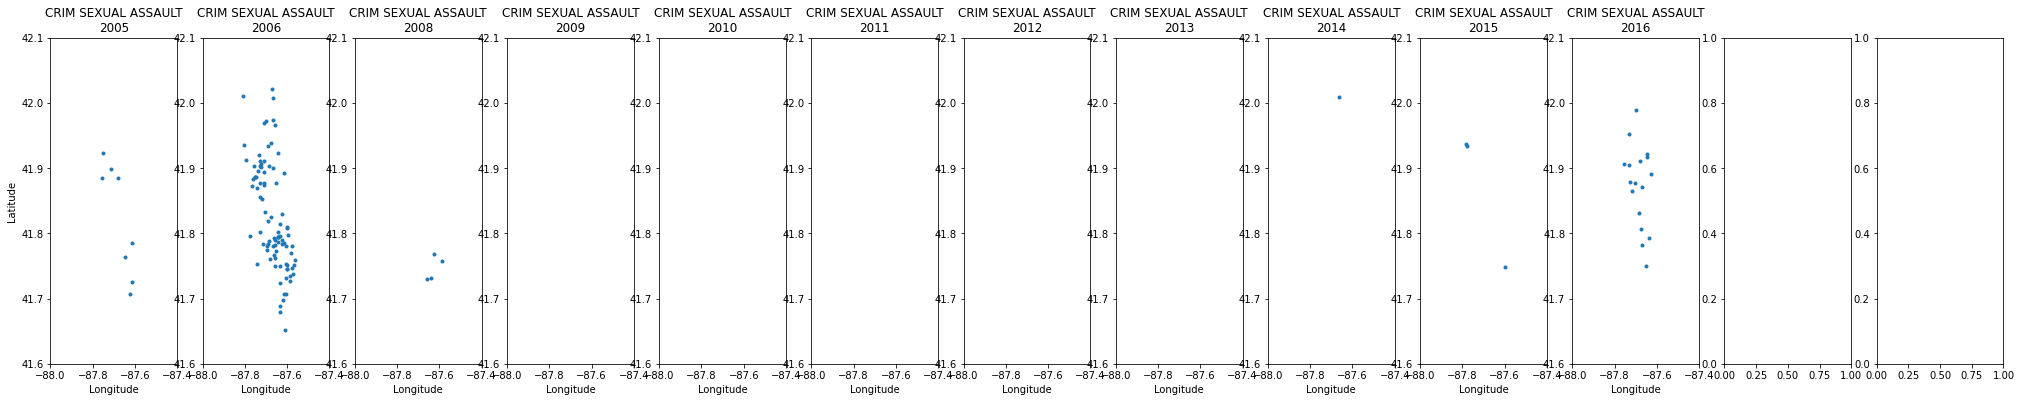

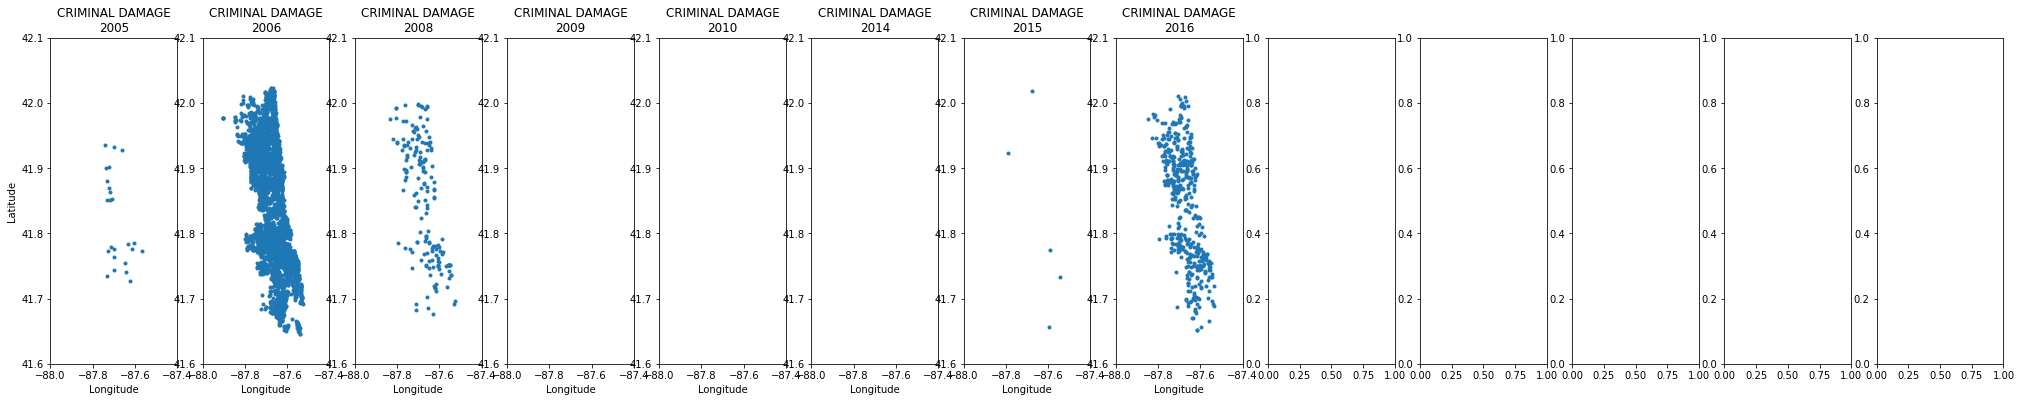

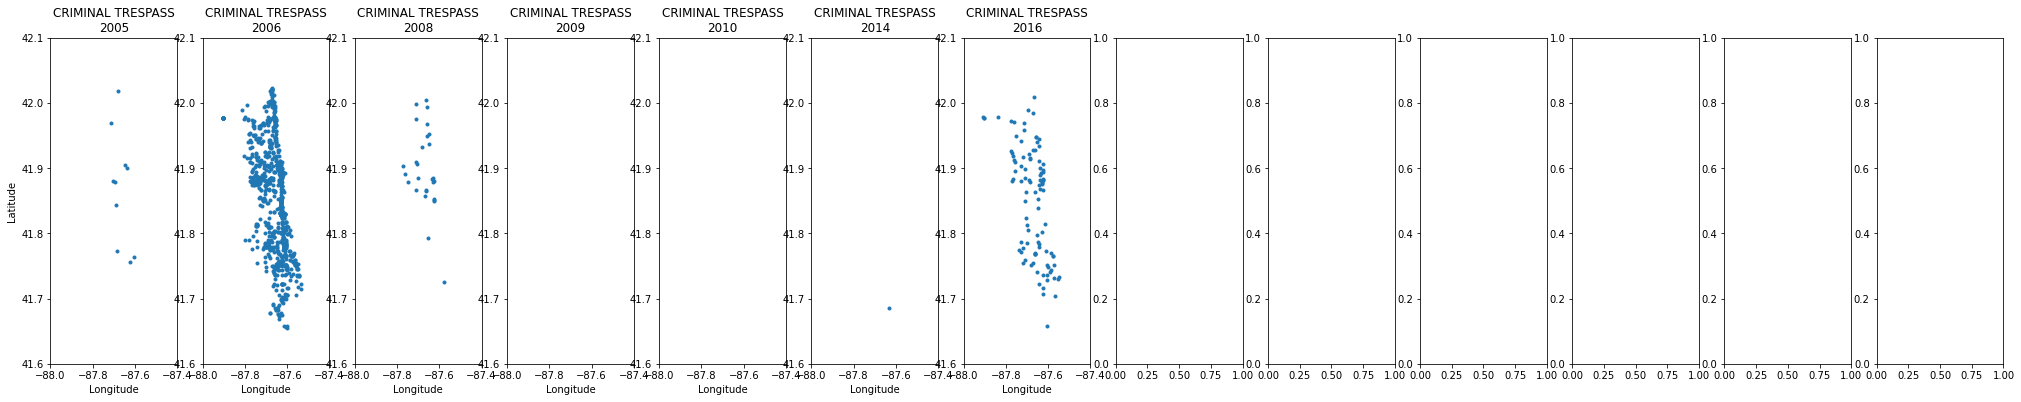

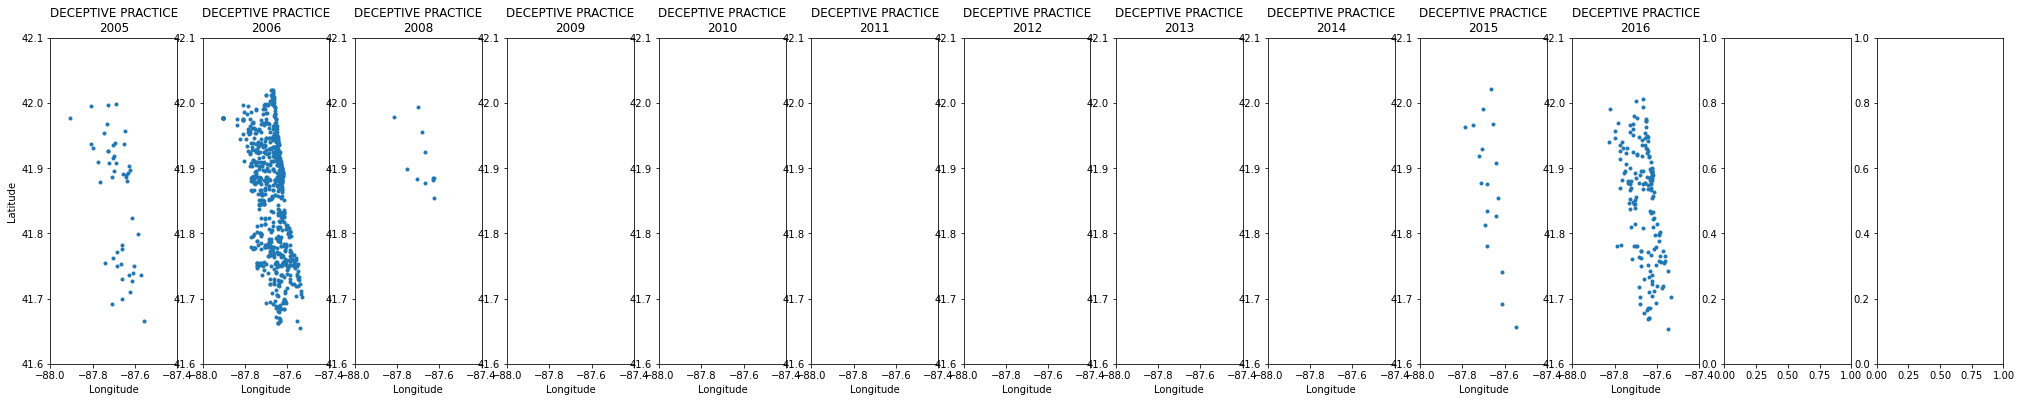

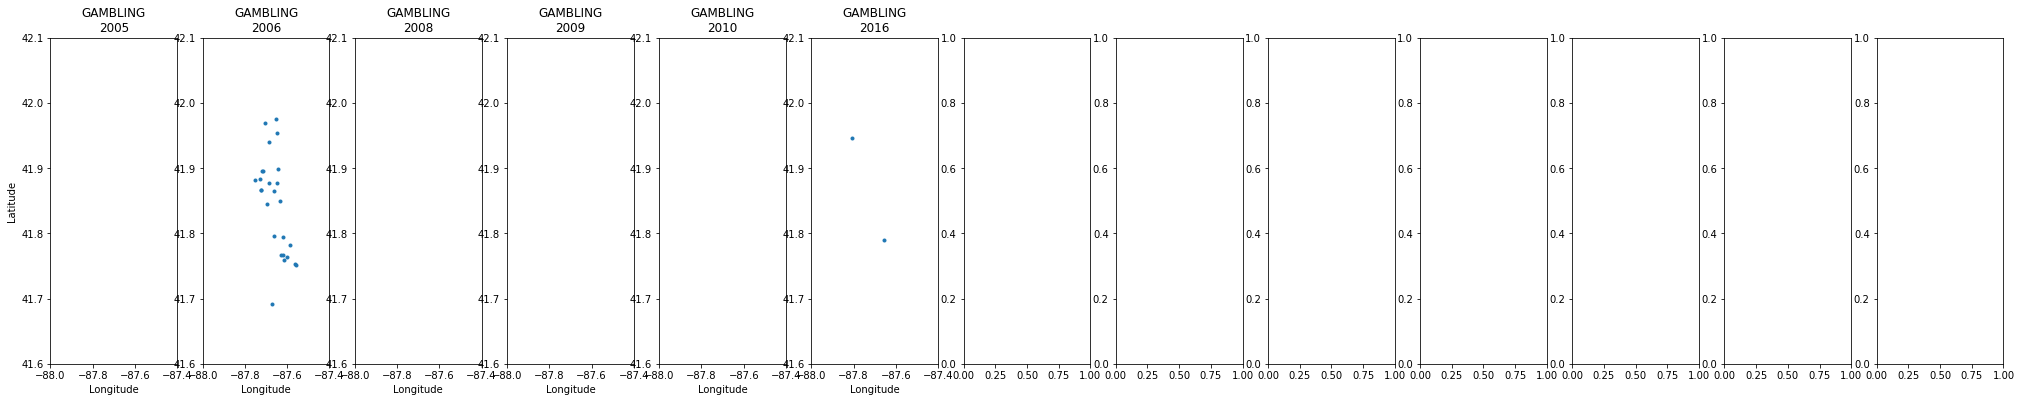

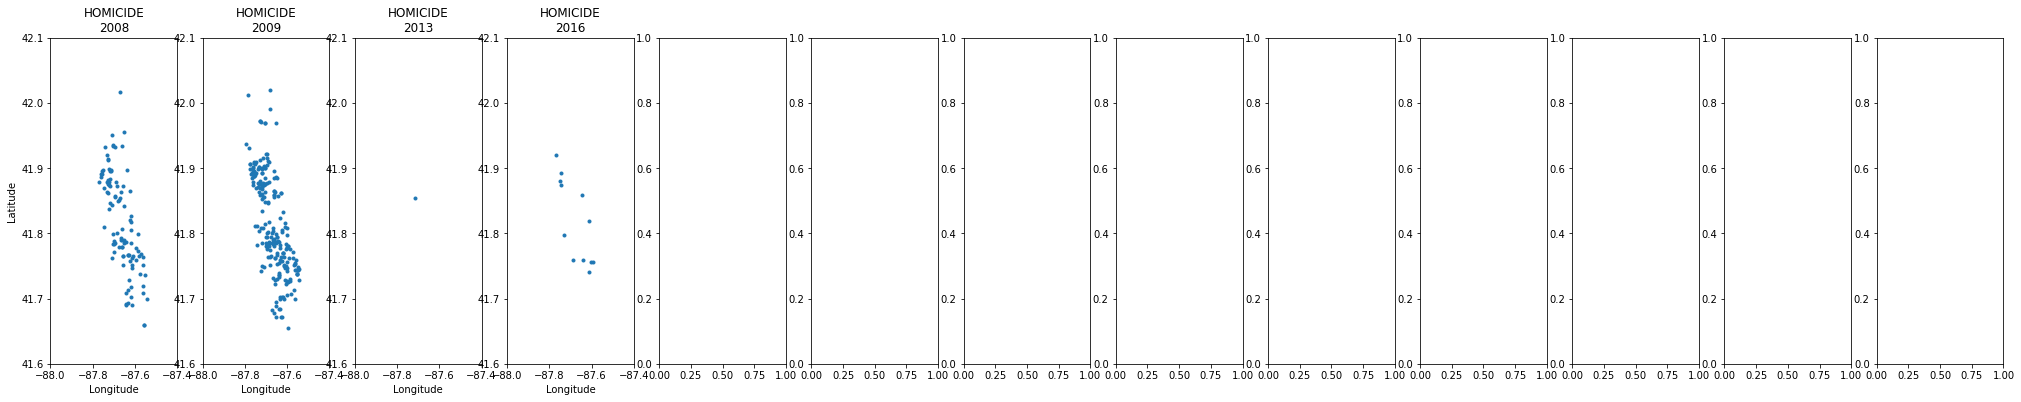

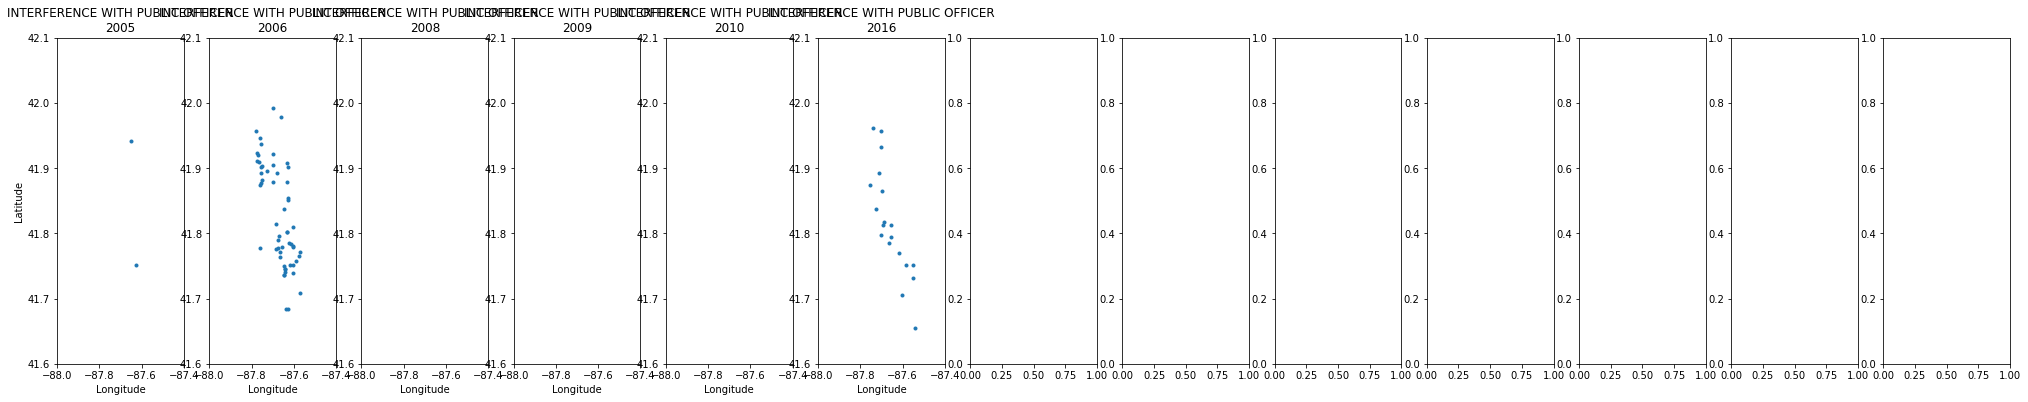

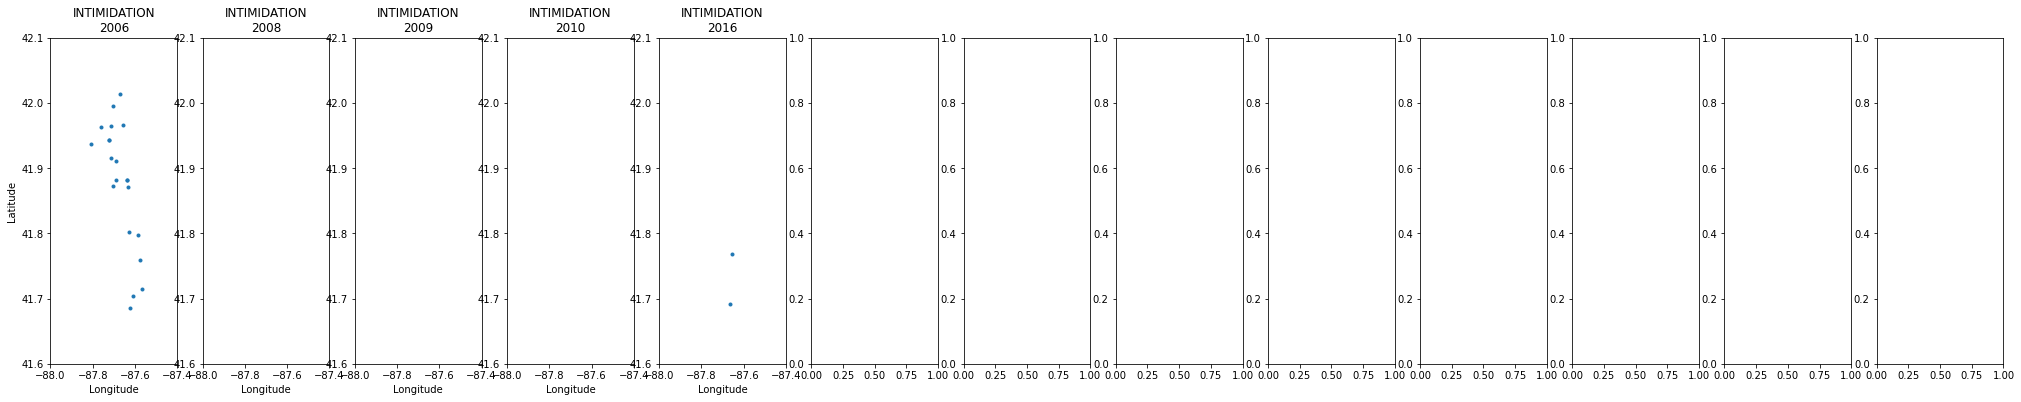

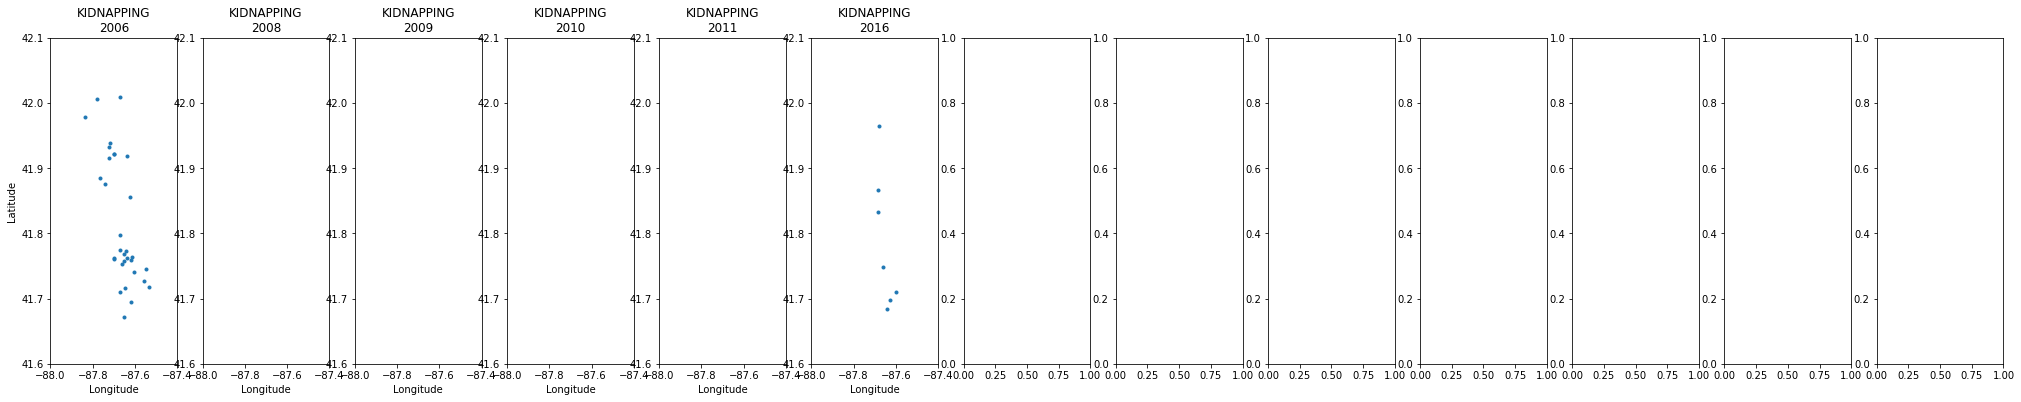

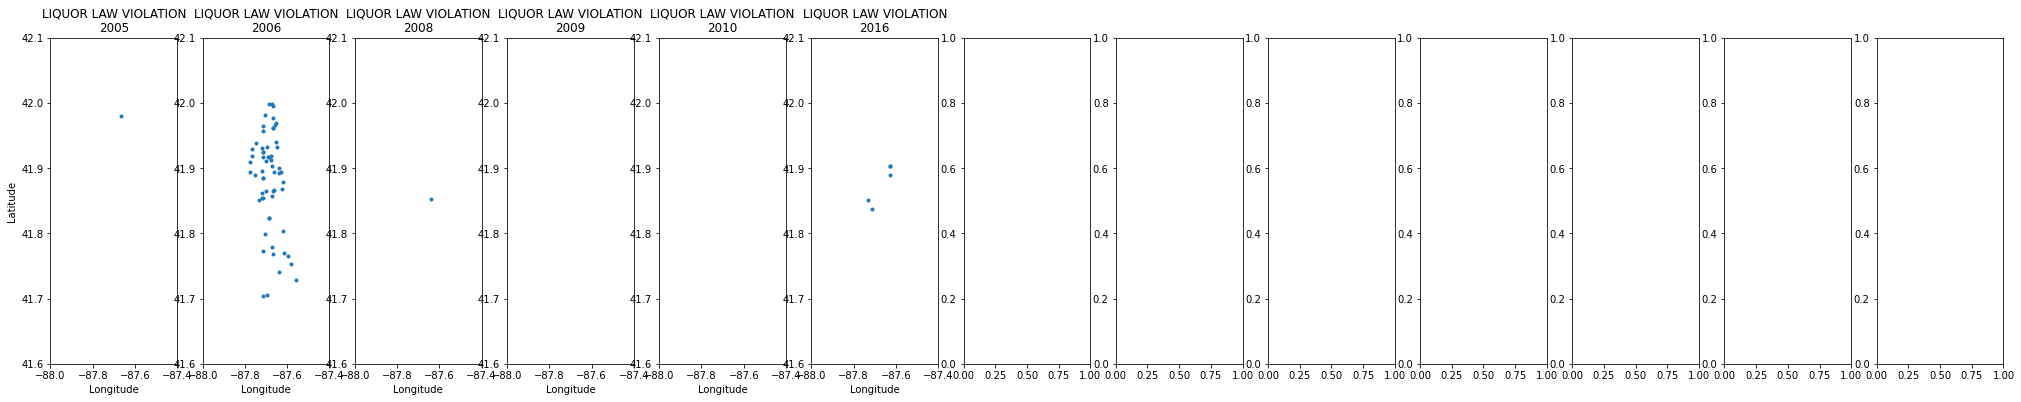

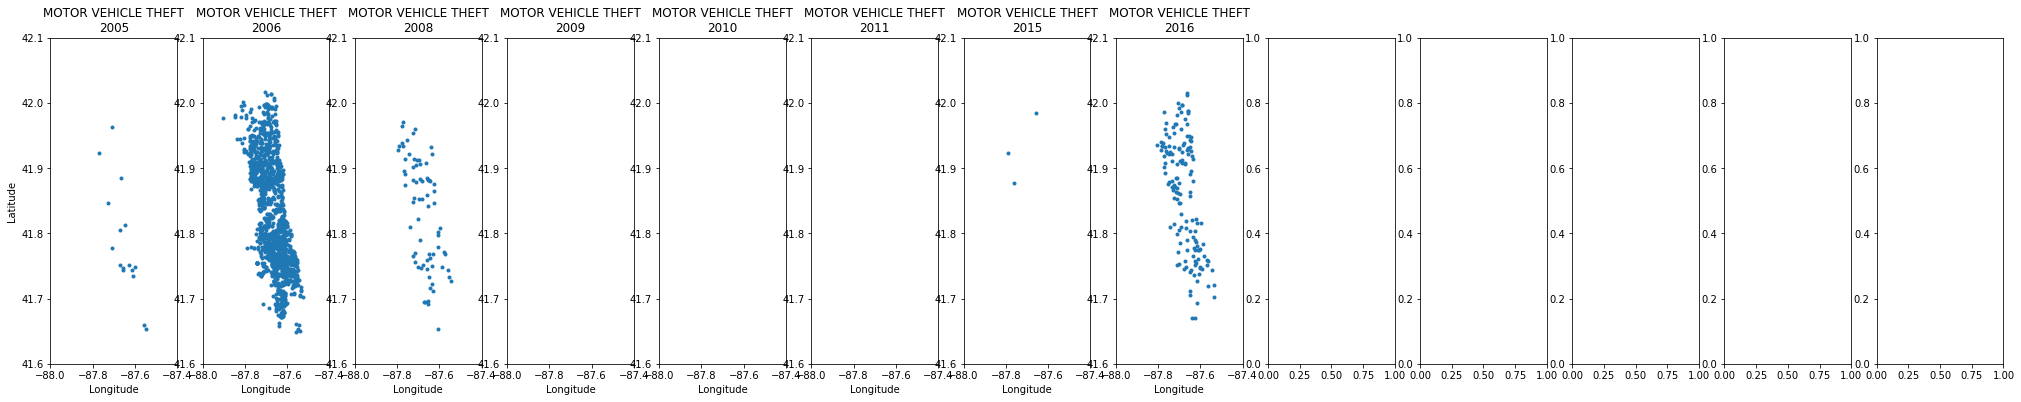

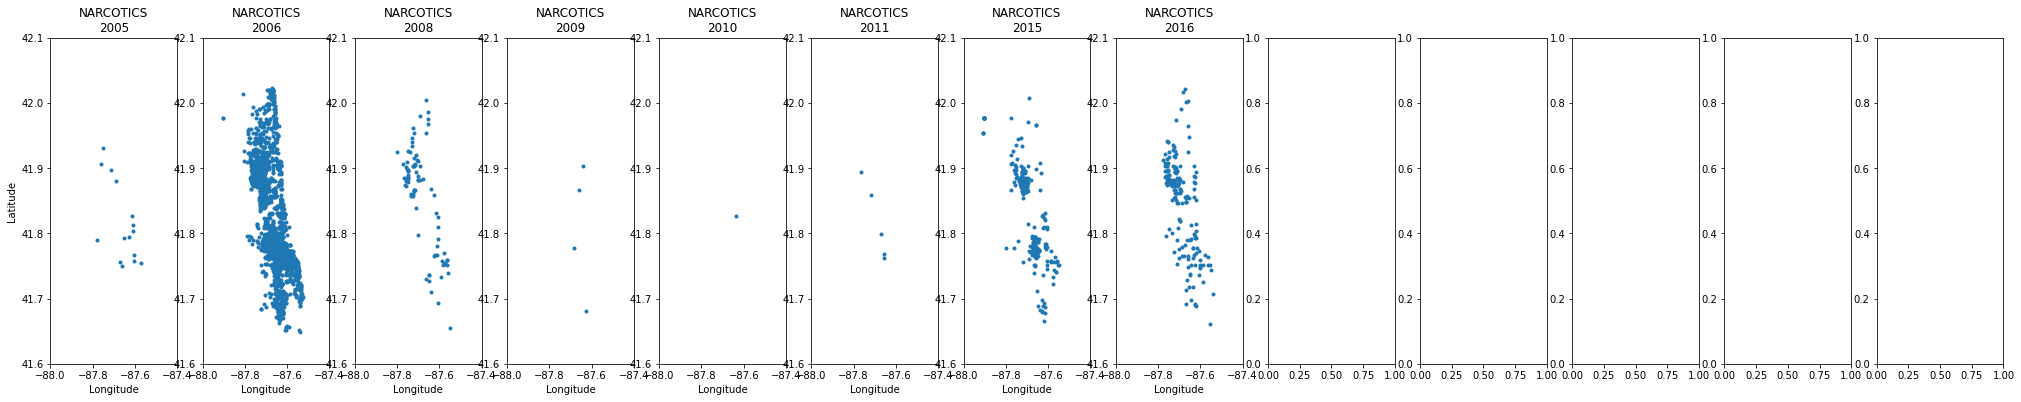

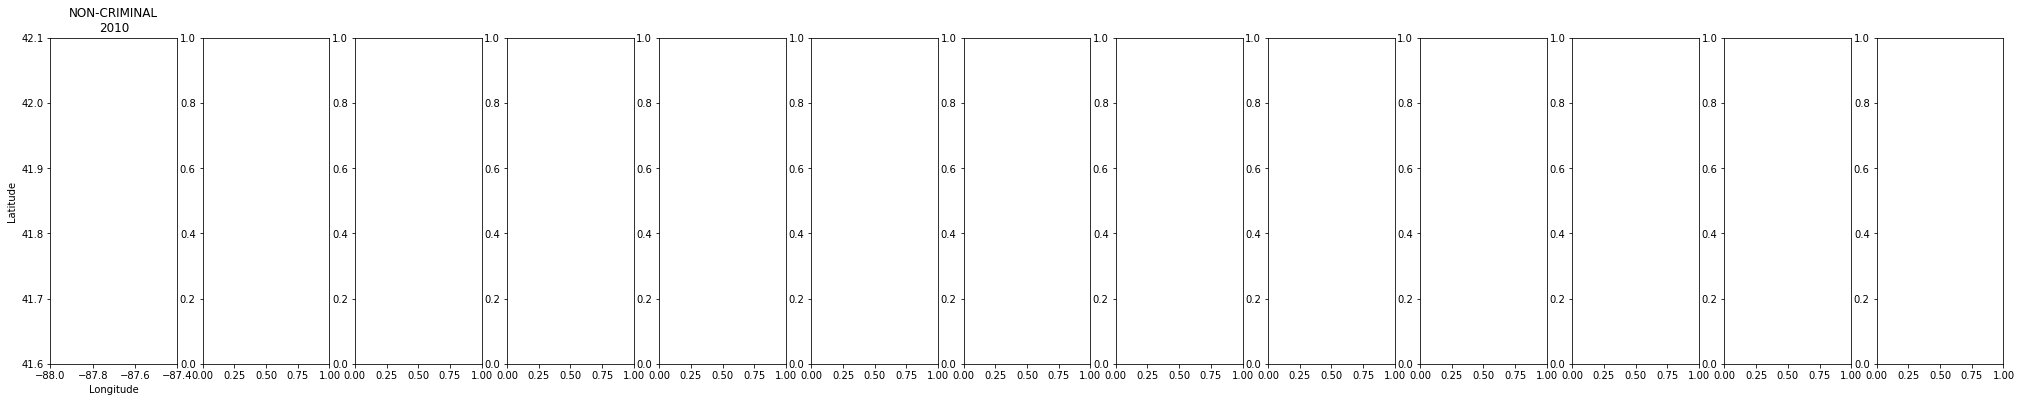

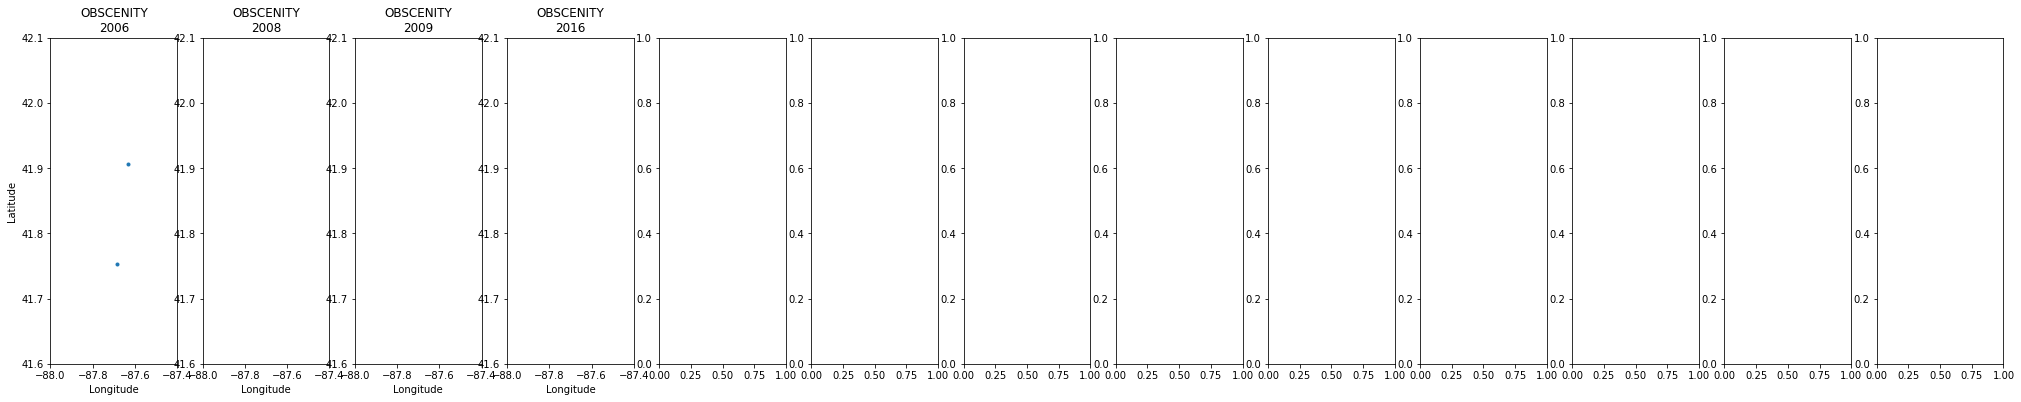

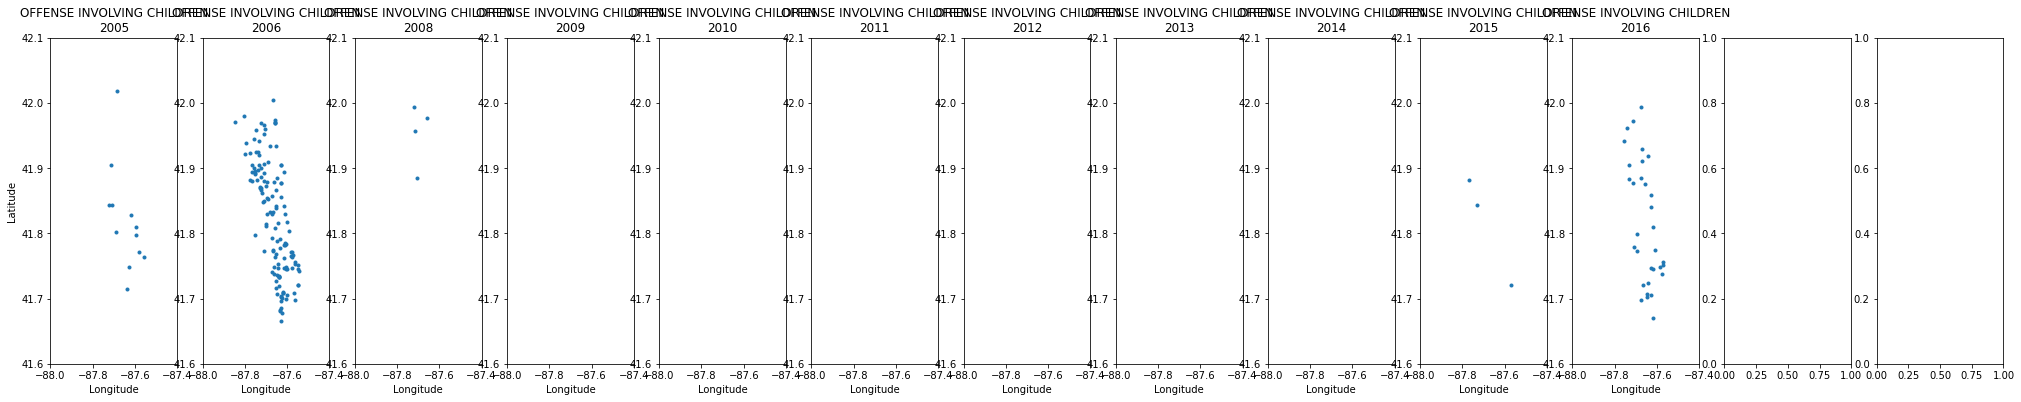

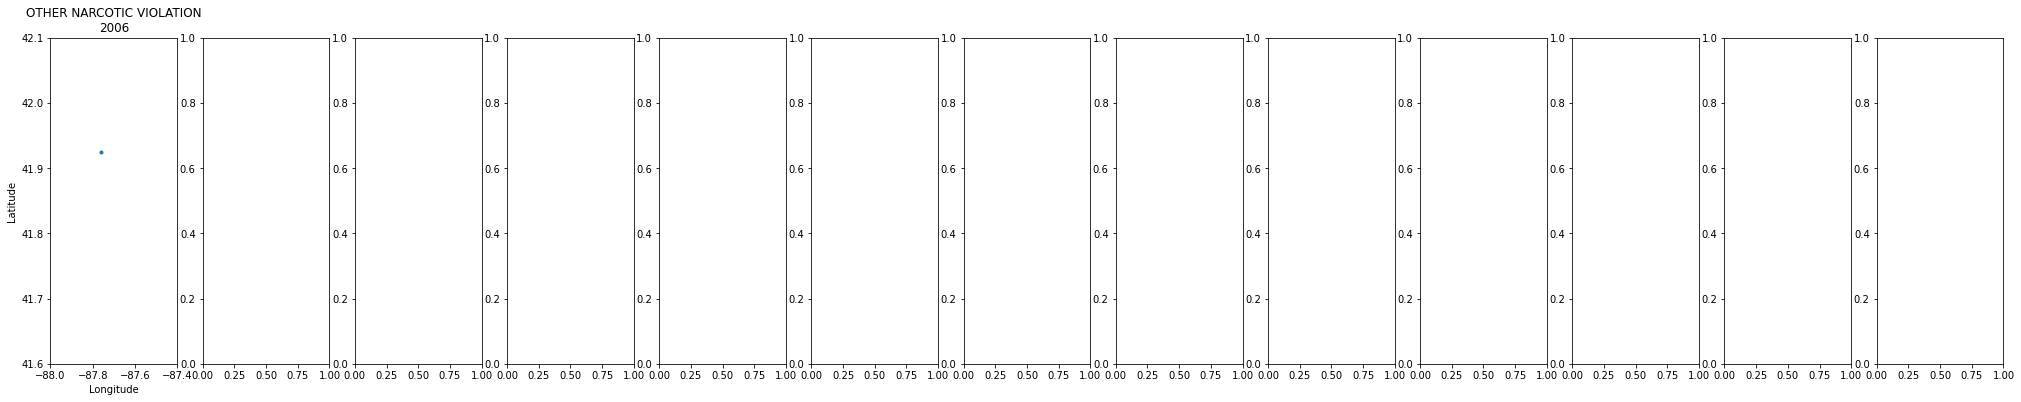

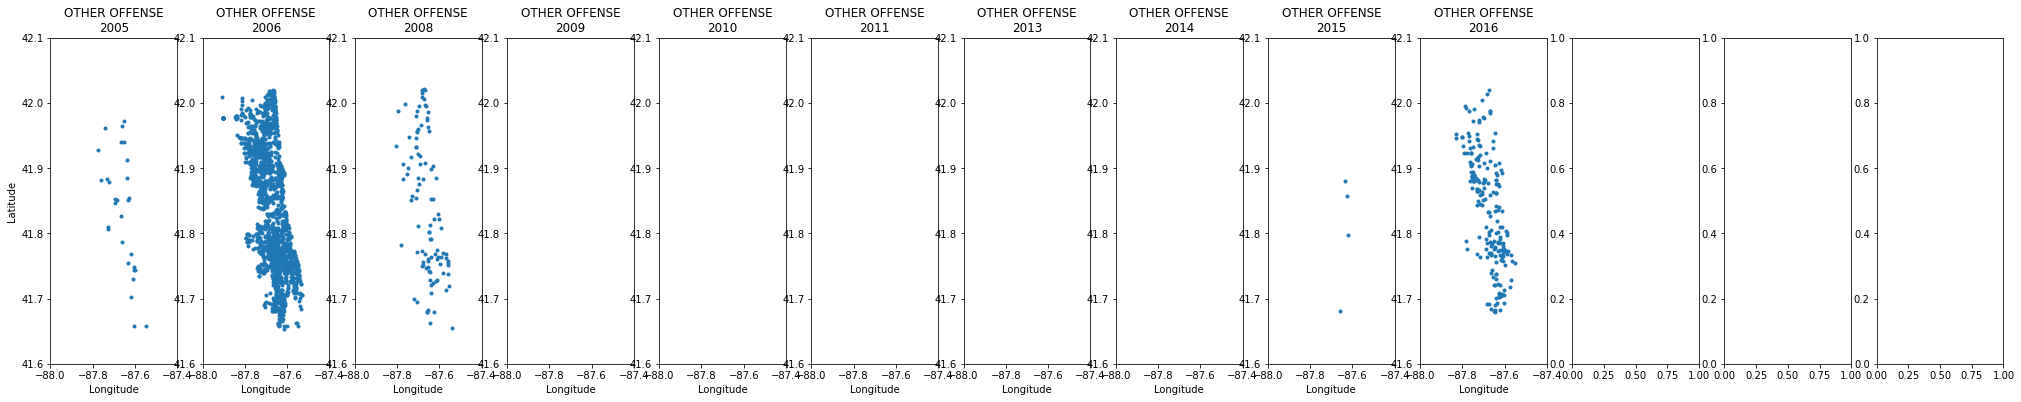

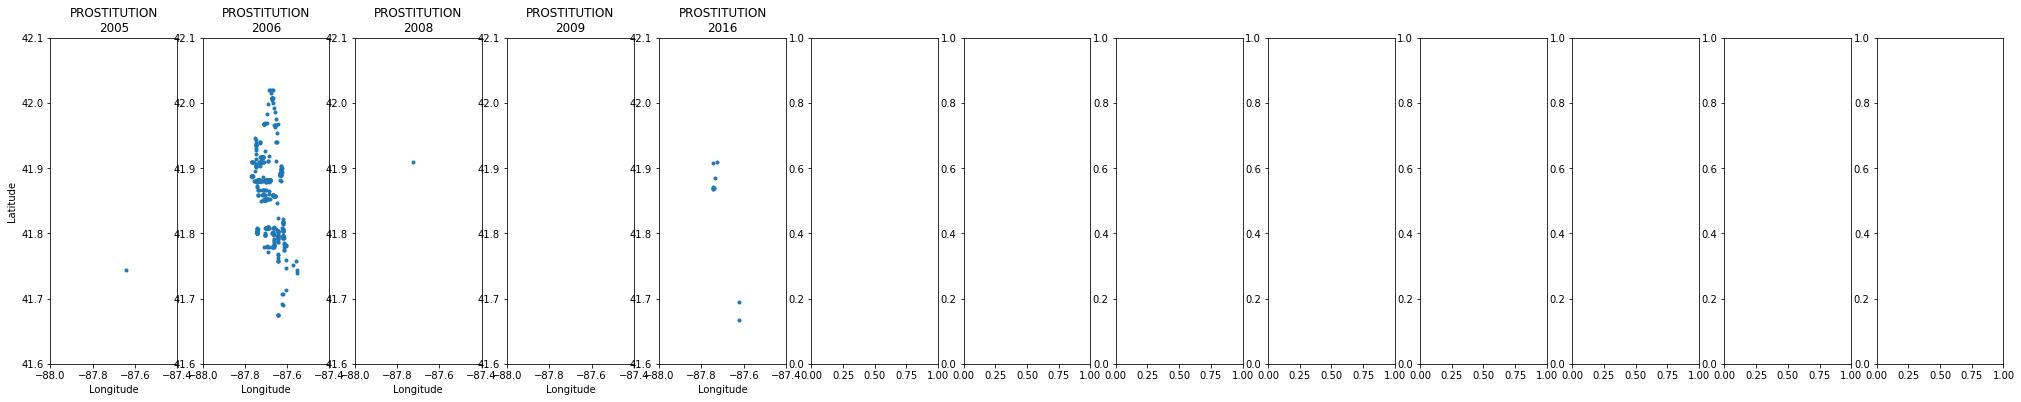

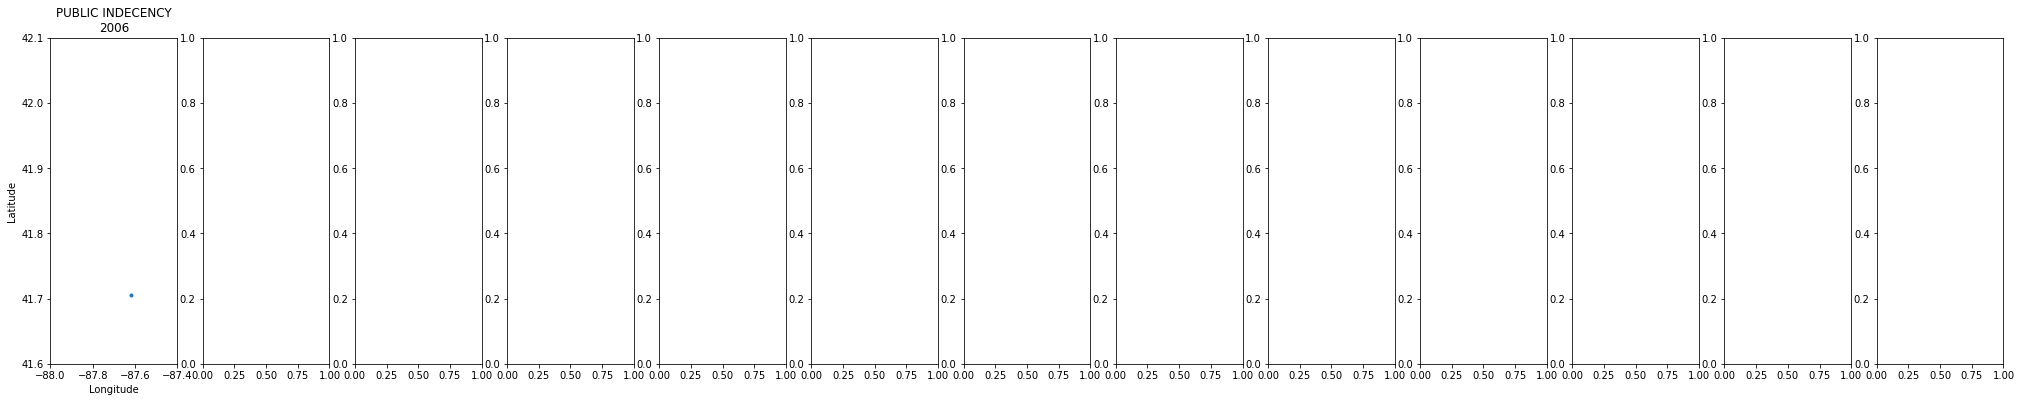

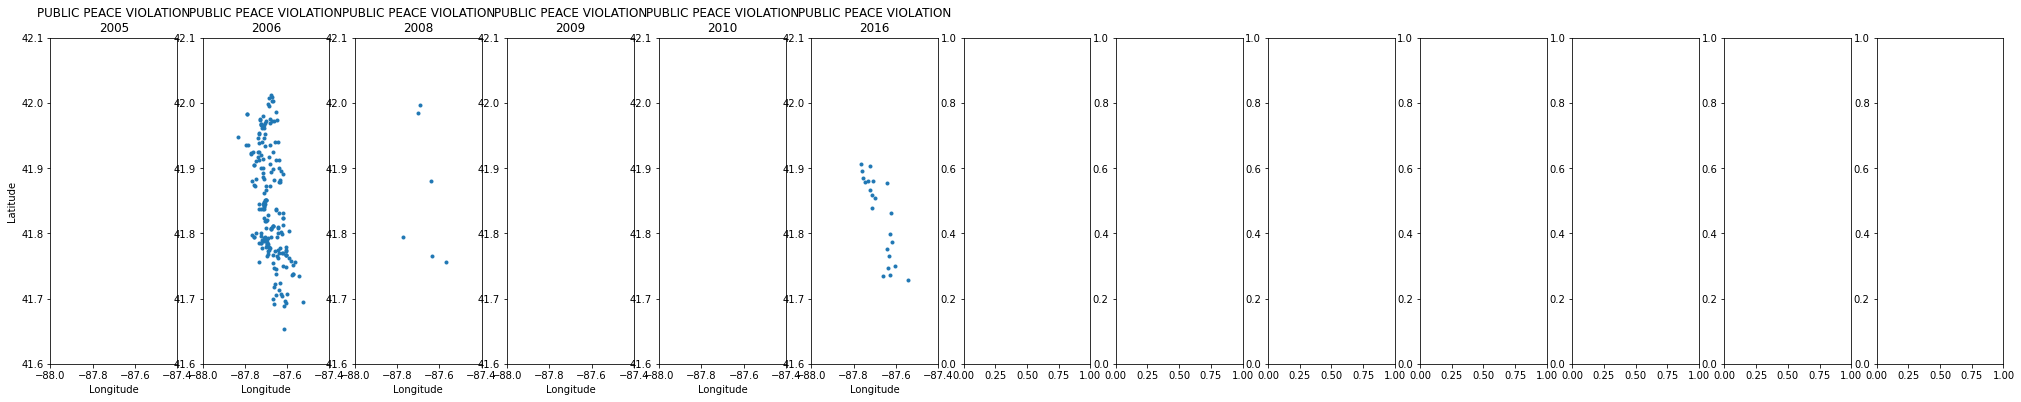

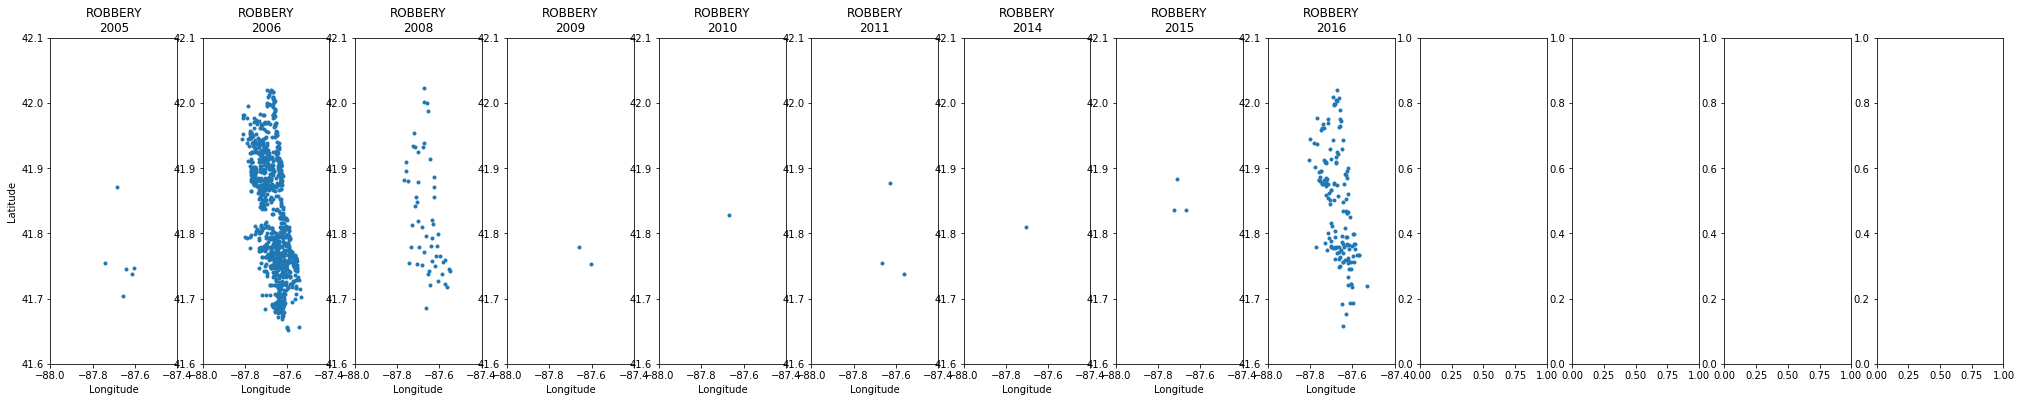

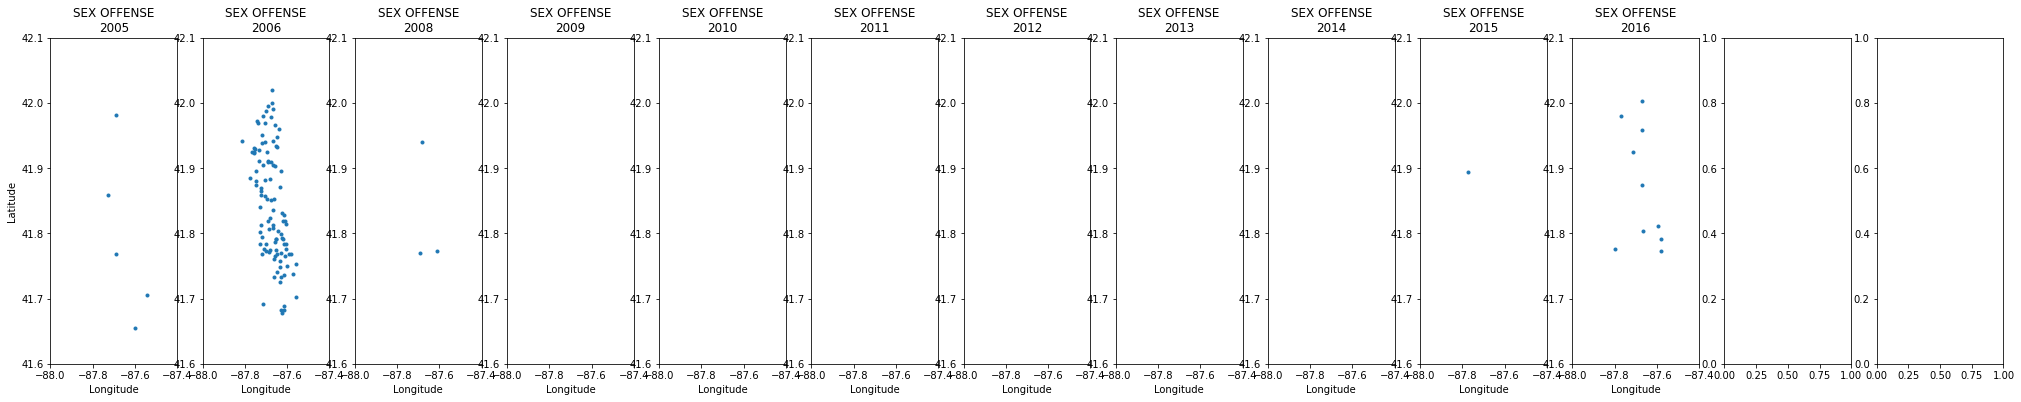

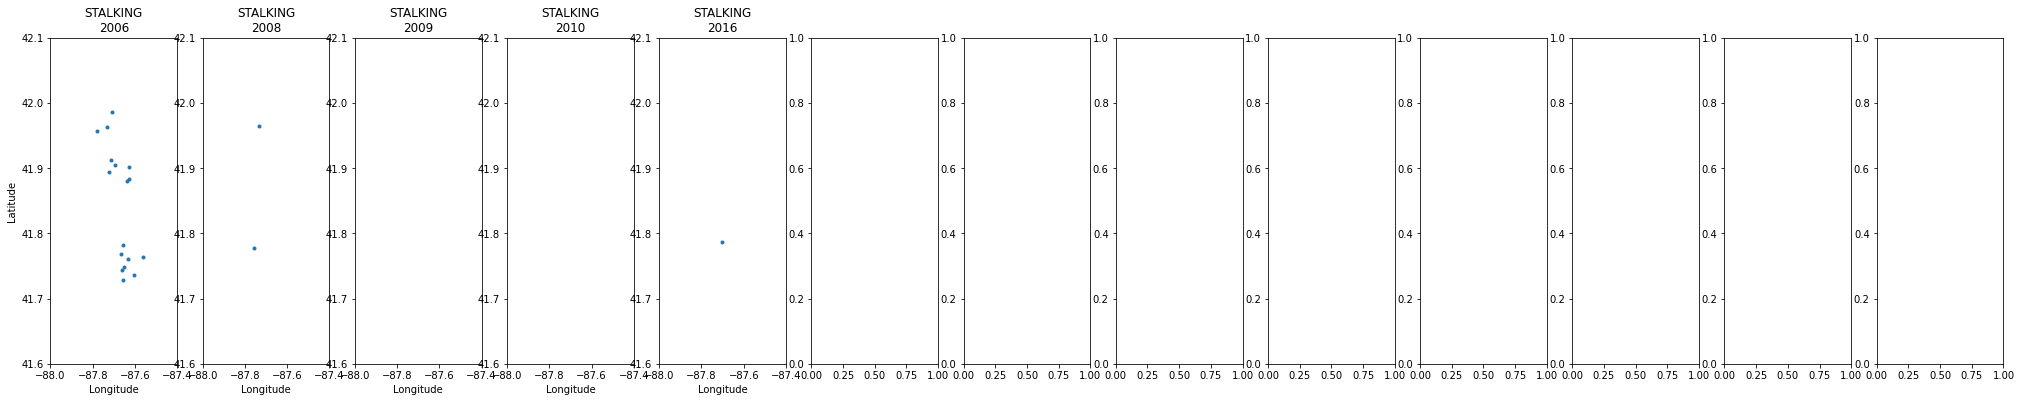

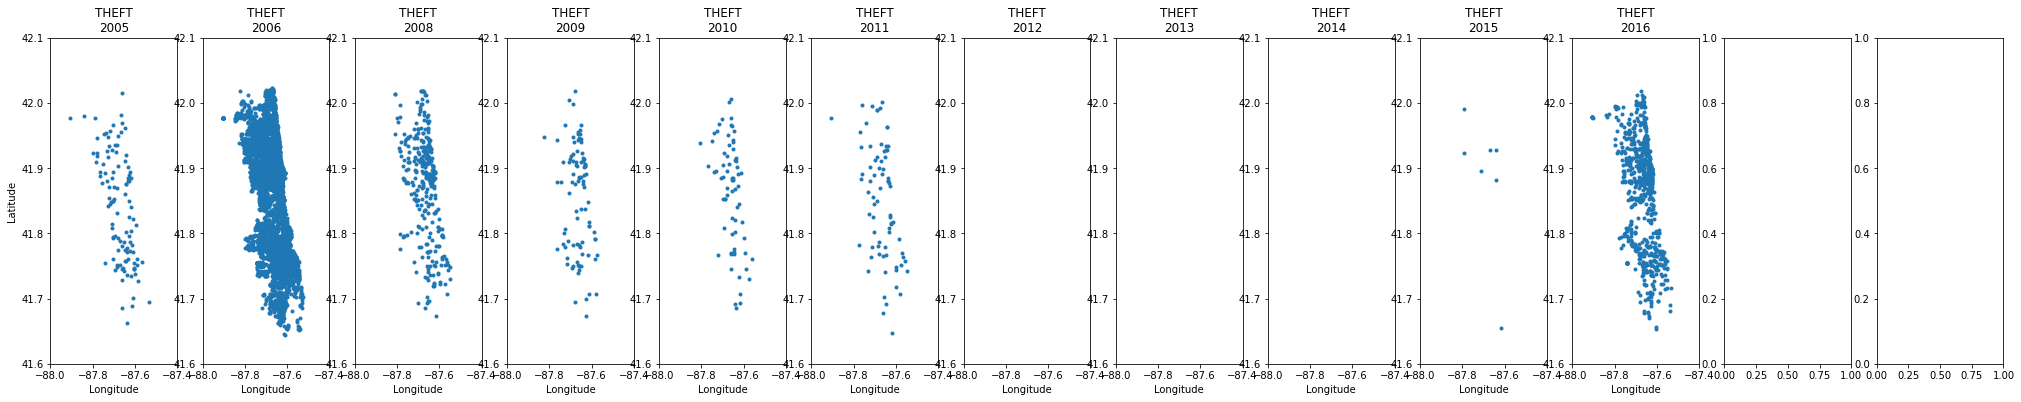

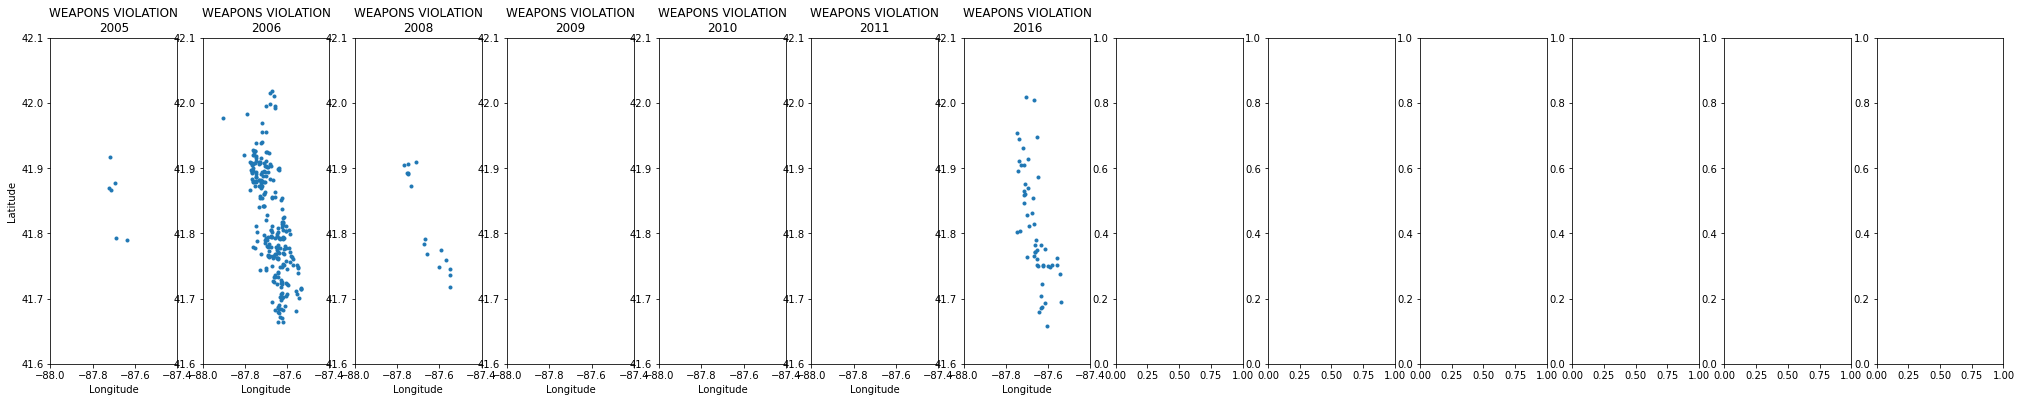

In [19]:
#look at patterns in crime movement across chicago
for key in Keys:
    i = 0
    Date_Groups = Groups[key].groupby(Groups[key].index.year)
    Date_Groups = dict(list(Date_Groups))
    Date_Keys = list(Date_Groups.keys())
    f, ax = plt.subplots(1,13)
    f.set_figheight(6)
    f.set_figwidth(35)
    for dkeys in Date_Keys:
        ax[i].scatter(Date_Groups[dkeys].Longitude, Date_Groups[dkeys].Latitude, marker = '.')
        ax[i].set_ylim(41.6,42.1)
        ax[i].set_xlim(-88,-87.4)
        f.subplots_adjust(hspace=2)
        s = key + "\n" + str(dkeys)
        ax[i].set_title(s)
        ax[0].set_ylabel('Latitude')
        ax[i].set_xlabel('Longitude')
        f.subplots_adjust(hspace = 2)
        i = i + 1
    plt.show()

In [20]:
Crime_Data_district = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['District'], 
                                         index = Crime_Data.index.date, fill_value = 0)
Crime_Data_ward = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['Ward'], 
                                         index = Crime_Data.index.date, fill_value = 0)
Crime_Data_ca = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['Community Area'], 
                                         index = Crime_Data.index.date, fill_value = 0)

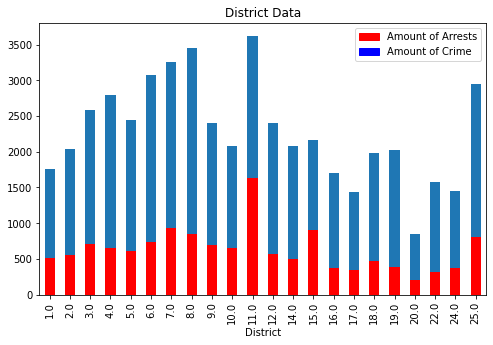

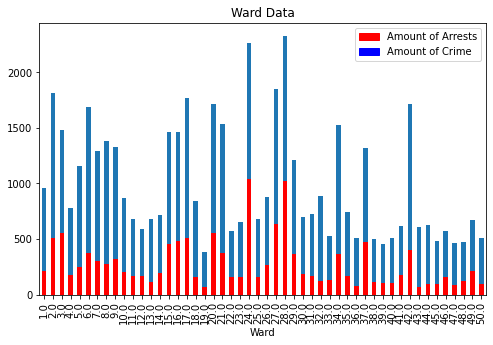

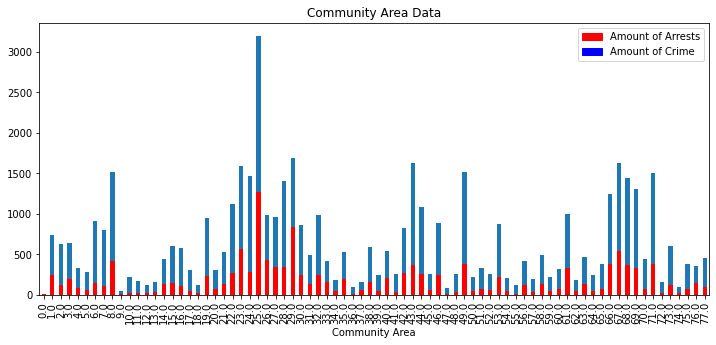

In [21]:
import matplotlib.patches as mpatches
red = mpatches.Patch(color='red', label='Amount of Arrests')
blue = mpatches.Patch(color='blue', label='Amount of Crime')


#crime per district
plt.figure(figsize = (8,5))
Crime_Data.groupby(Crime_Data['District']).size().plot(kind = 'bar')
Crime_Data_district.sum().plot(kind = 'bar', color = 'r')
plt.title('District Data')
plt.legend(handles=[red, blue])
#crime per ward
plt.figure(figsize = (8,5))
Crime_Data.groupby(Crime_Data['Ward']).size().plot(kind = 'bar')
Crime_Data_ward.sum().plot(kind = 'bar', color = 'r')
plt.title('Ward Data')
plt.legend(handles=[red, blue])
#crime per Community Area
plt.figure(figsize = (12,5))
Crime_Data.groupby(Crime_Data['Community Area']).size().plot(kind = 'bar')
Crime_Data_ca.sum().plot(kind = 'bar', color = 'r')
plt.title('Community Area Data')
plt.legend(handles=[red, blue])
plt.show()

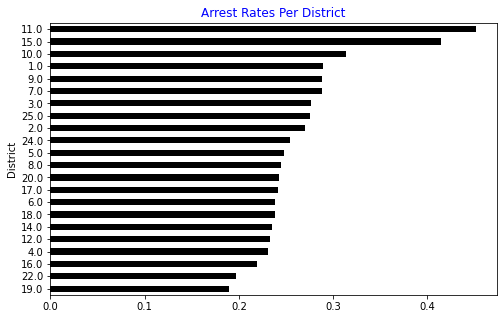

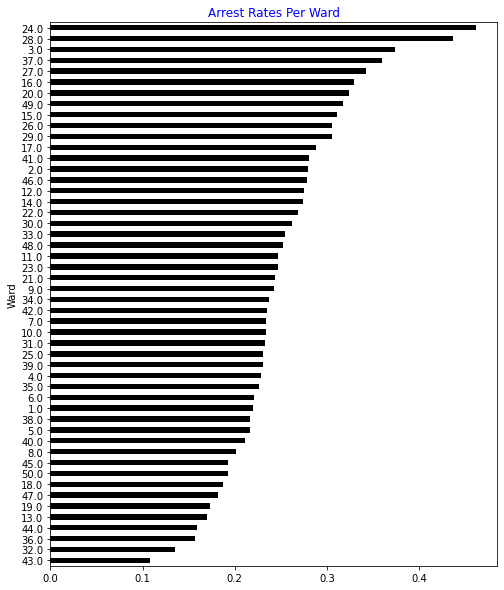

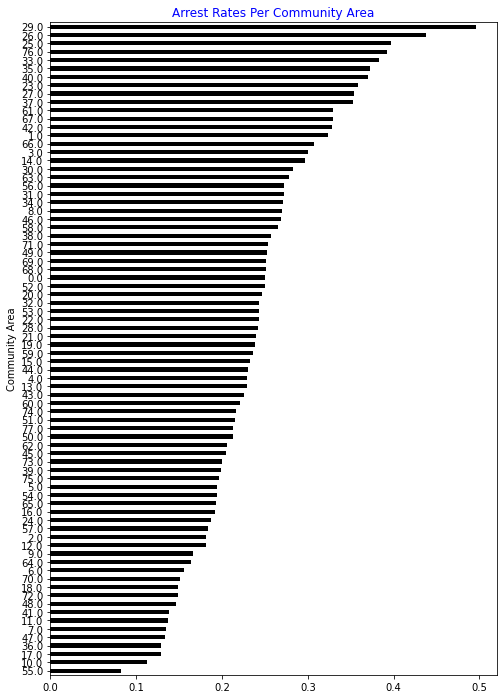

In [22]:
#Arrest rates per community area, ward, and district
A_R_D = Crime_Data_district.sum() / Crime_Data.groupby(Crime_Data['District']).size()
A_R_W = Crime_Data_ward.sum() / Crime_Data.groupby(Crime_Data['Ward']).size()
A_R_CA = Crime_Data_ca.sum() / Crime_Data.groupby(Crime_Data['Community Area']).size()

plt.figure(figsize = (8,5))
A_R_D.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per District', color = 'b')
plt.figure(figsize = (8,10))
A_R_W.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Ward', color = 'b')
plt.figure(figsize=(8,12))
A_R_CA.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Community Area', color = 'b')
plt.show()

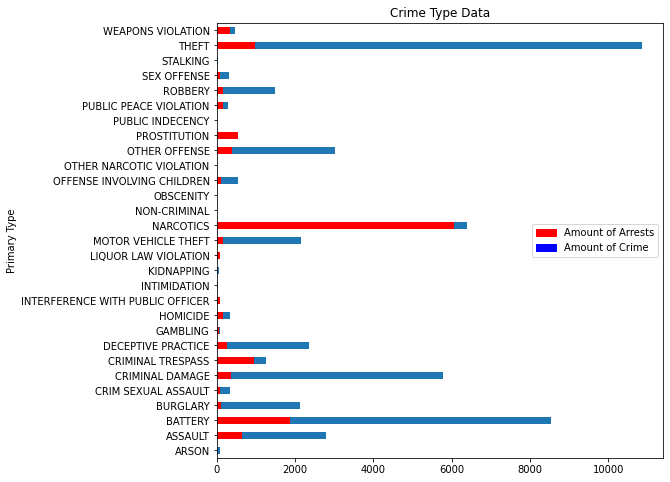

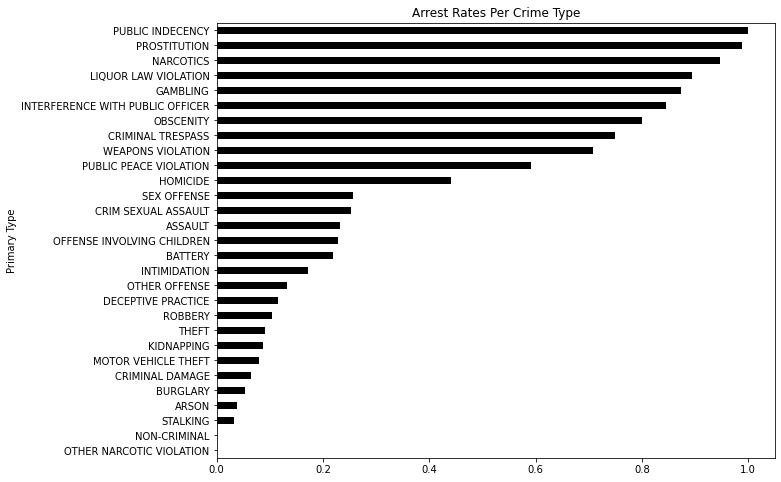

In [23]:
#Arrest rates per crime type
Crime_Data_Type = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['Primary Type'], 
                                         index = Crime_Data.index.date, fill_value = 0)
#crime per district
plt.figure(figsize = (8,8))
Crime_Data.groupby(Crime_Data['Primary Type']).size().plot(kind = 'barh')
Crime_Data_Type.sum().plot(kind = 'barh', color = 'r')
plt.title('Crime Type Data')
plt.legend(handles=[red, blue])

plt.figure(figsize = (10,8))
A_R_PT = Crime_Data_Type.sum() / Crime_Data.groupby(Crime_Data['Primary Type']).size()
A_R_PT.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Crime Type')
plt.show()

In [24]:
A = Crime_Data_Type.sum() / Crime_Data.groupby(Crime_Data['Primary Type']).size()

In [25]:
mean_A = Crime_Data['Arrest'].sum() / Crime_Data.shape[0]

In [26]:
stderr_A = np.std(A) / (Crime_Data_Type.shape[1]) ** (1/2.0)

In [27]:
high_A = mean_A + 1.96 * stderr_A
low_A = mean_A - 1.96 * stderr_A
print(A)
print("Average Arrest rate is 95% between (", low_A, ",", high_A, ")")

Primary Type
ARSON                               0.038462
ASSAULT                             0.231485
BATTERY                             0.218860
BURGLARY                            0.053814
CRIM SEXUAL ASSAULT                 0.252149
CRIMINAL DAMAGE                     0.065247
CRIMINAL TRESPASS                   0.749013
DECEPTIVE PRACTICE                  0.114636
GAMBLING                            0.873418
HOMICIDE                            0.441261
INTERFERENCE WITH PUBLIC OFFICER    0.845361
INTIMIDATION                        0.172414
KIDNAPPING                          0.086957
LIQUOR LAW VIOLATION                0.893617
MOTOR VEHICLE THEFT                 0.080056
NARCOTICS                           0.946784
NON-CRIMINAL                        0.000000
OBSCENITY                           0.800000
OFFENSE INVOLVING CHILDREN          0.227612
OTHER NARCOTIC VIOLATION            0.000000
OTHER OFFENSE                       0.131430
PROSTITUTION                        0.9891

In [28]:
for i in range(len(A)):
    if (A[i] <= low_A or A[i] >= high_A):
        print(A.index[i], A[i])

ARSON 0.038461538461538464
BURGLARY 0.05381375760411792
CRIMINAL DAMAGE 0.06524749048113535
CRIMINAL TRESPASS 0.7490134175217048
DECEPTIVE PRACTICE 0.11463620981387479
GAMBLING 0.8734177215189873
HOMICIDE 0.44126074498567336
INTERFERENCE WITH PUBLIC OFFICER 0.845360824742268
KIDNAPPING 0.08695652173913043
LIQUOR LAW VIOLATION 0.8936170212765957
MOTOR VEHICLE THEFT 0.08005552984729292
NARCOTICS 0.9467835341994052
NON-CRIMINAL 0.0
OBSCENITY 0.8
OTHER NARCOTIC VIOLATION 0.0
OTHER OFFENSE 0.13143046797212082
PROSTITUTION 0.9891891891891892
PUBLIC INDECENCY 1.0
PUBLIC PEACE VIOLATION 0.5905797101449275
ROBBERY 0.10335570469798658
STALKING 0.03225806451612903
THEFT 0.09090909090909091
WEAPONS VIOLATION 0.7077244258872651


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
